In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Loading the homicide data

In [3]:
homicide_df = pd.read_csv('data/homicide-data.csv', encoding='ISO-8859-1')
homicide_df.head()

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest


In [4]:
len(homicide_df)

52179

In [5]:
homicide_df.isna().sum()

uid               0
reported_date     0
victim_last       1
victim_first      0
victim_race       0
victim_age        0
victim_sex        0
city              0
state             0
lat              60
lon              60
disposition       0
dtype: int64

In [6]:
homicide_df[homicide_df['victim_last'].isna()]

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
13706,Col-000255,20140619,NaN,GARY II,White,39,Male,Columbus,OH,39.935054,-82.994613,Closed by arrest


In [7]:
# Fill it with '' 
homicide_df['victim_last'] = homicide_df['victim_last'].fillna('')
homicide_df.isna().sum()

uid               0
reported_date     0
victim_last       0
victim_first      0
victim_race       0
victim_age        0
victim_sex        0
city              0
state             0
lat              60
lon              60
disposition       0
dtype: int64

In [8]:
# Remove rows with missing values in 'lat' and 'lon'
homicide_df = homicide_df.dropna(subset=['lat', 'lon'])
homicide_df.isna().sum()

uid              0
reported_date    0
victim_last      0
victim_first     0
victim_race      0
victim_age       0
victim_sex       0
city             0
state            0
lat              0
lon              0
disposition      0
dtype: int64

## Loading the income data

In [9]:
income_df = pd.read_csv('data/kaggle_income.csv', encoding='ISO-8859-1')
income_df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [10]:
len(income_df)

32526

In [11]:
income_df.isna().sum()

id            0
State_Code    0
State_Name    0
State_ab      0
County        0
City          0
Place         0
Type          0
Primary       0
Zip_Code      0
Area_Code     0
ALand         0
AWater        0
Lat           0
Lon           0
Mean          0
Median        0
Stdev         0
sum_w         0
dtype: int64

## Joining the two datasets

In [ ]:
# Join the two dataframes on 'city'
df = homicide_df.merge(income_df, left_on='city', right_on='City')
df.head()

In [14]:
len(df)

6609016

In [16]:
# Keep unique uids only
df = df.drop_duplicates(subset=['uid'])

len(df)


52119

In [17]:
df.to_csv('data/final_merged_dataset.csv', index=False)

In [14]:
print(f'Number of cities in homicide data: {len(homicide_df["city"].unique())}')
print(f'Number of cities in income data: {len(income_df["City"].unique())}')
print(f'Number of cities in joined data: {len(df["city"].unique())}')

Number of cities in homicide data: 50
Number of cities in income data: 8128
Number of cities in joined data: 50


In [15]:
df.columns

Index(['uid', 'reported_date', 'victim_last', 'victim_first', 'victim_race',
       'victim_age', 'victim_sex', 'city', 'state', 'lat', 'lon',
       'disposition', 'id', 'State_Code', 'State_Name', 'State_ab', 'County',
       'City', 'Place', 'Type', 'Primary', 'Zip_Code', 'Area_Code', 'ALand',
       'AWater', 'Lat', 'Lon', 'Mean', 'Median', 'Stdev', 'sum_w'],
      dtype='object')

In [16]:
# Remove unnecessary columns
df = df[['uid', 'reported_date', 'victim_race',
       'victim_age', 'victim_sex', 'city', 'state', 'lat', 'lon',
       'disposition', 'ALand', 'AWater', 'Mean', 'Median', 'Stdev']]
df.head()

,uid,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,ALand,AWater,Mean,Median,Stdev
0,Alb-000001,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,32361309,0,16025,300000,7037
1,Alb-000001,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,8569319,1543599,54511,41547,44844
2,Alb-000001,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,1586195582,701088,74250,60784,54641
3,Alb-000001,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,1811244,0,79960,64720,55570
4,Alb-000001,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,3538024,89947,56146,49876,45409


In [37]:
df_sample = df

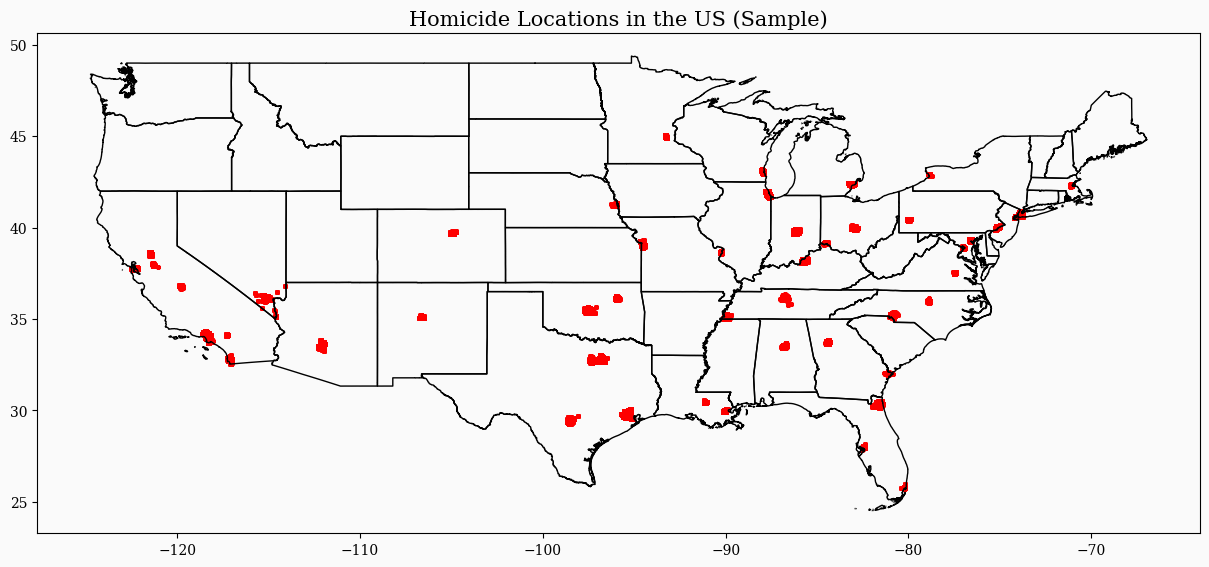

In [47]:
import geopandas as gpd
from PIL import Image
from matplotlib.patches import Patch, Circle

# PLot on us map
us_map = gpd.read_file('./data/cb_2018_us_state_500k')
us_map = us_map[~us_map.STATEFP.isin(["72", "69", "60", "66", "78", "02", "15"])]


fig, ax = plt.subplots(figsize=(15, 15))
us_map.boundary.plot(ax=ax, linewidth=1, color='black')
df_sample_gdf = gpd.GeoDataFrame(
    df_sample, geometry=gpd.points_from_xy(df_sample.lon, df_sample.lat))
df_sample_gdf.plot(ax=ax, color='red', markersize=5, alpha=0.5)
plt.title('Homicide Locations in the US (Sample)', fontsize=15)
plt.show()

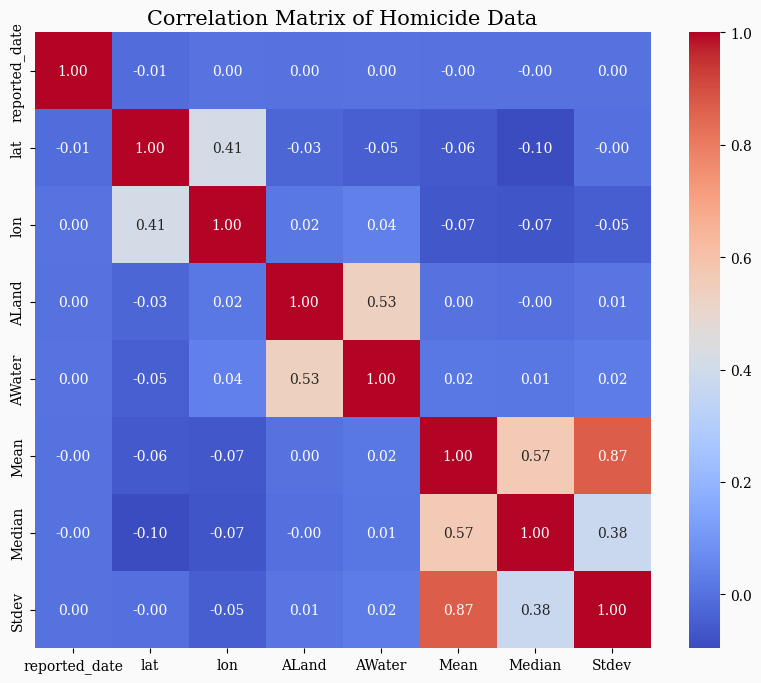

In [45]:
# Correlation matrix of numerical features
df_numeric = df.select_dtypes(include=[np.number])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Homicide Data', fontsize=15)
plt.show()

In [13]:
# scatter plot median 
# bar charts
# us map

In [14]:
sns.set(style="whitegrid")
%matplotlib inline

/var/folders/0j/3lv56g2525j0z_5_twj5hj_m0000gn/T/ipykernel_76627/3726640245.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


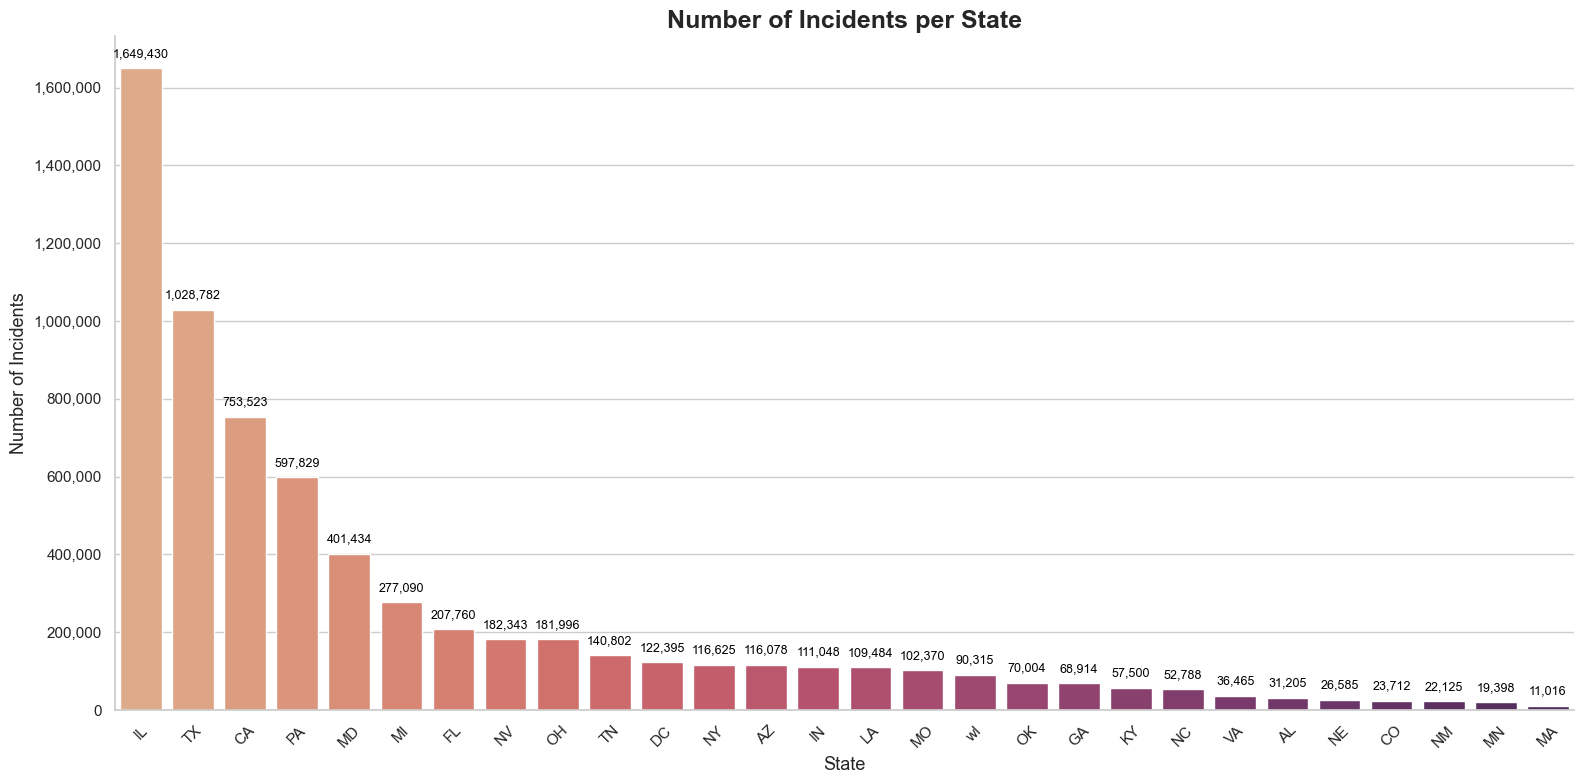

In [19]:
import matplotlib.ticker as mtick

plt.figure(figsize=(16, 8))

palette = sns.color_palette("flare", as_cmap=False, n_colors=len(df['state'].value_counts()))


ax = sns.countplot(
    data=df,
    x='state',
    order=df['state'].value_counts().index,
    palette=palette
)

# Format large numbers with commas
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9,
                color='black', xytext=(0, 6), textcoords='offset points')

# Styling
ax.set_title("Number of Incidents per State", fontsize=18, fontweight='bold')
ax.set_xlabel("State", fontsize=13)
ax.set_ylabel("Number of Incidents", fontsize=13)
ax.tick_params(axis='x', rotation=45)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

sns.despine()
plt.tight_layout()
plt.show()




/var/folders/0j/3lv56g2525j0z_5_twj5hj_m0000gn/T/ipykernel_76627/2563063621.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


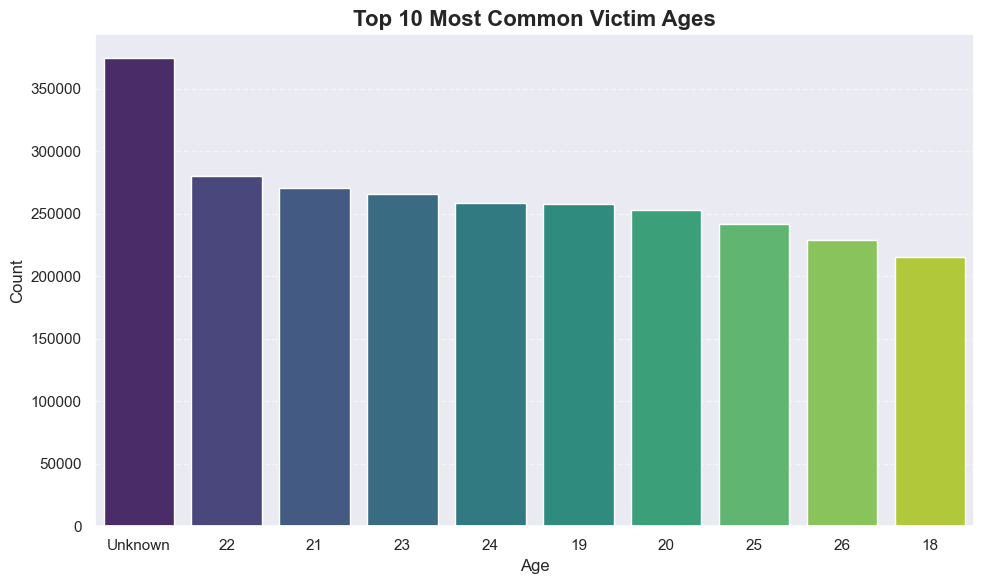

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 most frequent victim ages
top_ages = df['victim_age'].value_counts().nlargest(10).index

# Filter dataset to only include those ages
top_age_df = df[df['victim_age'].isin(top_ages)]

plt.figure(figsize=(10, 6))
sns.countplot(
    data=top_age_df,
    x='victim_age',
    order=top_ages,
    palette='viridis'  # clean, bright, colorblind-friendly
)

plt.title("Top 10 Most Common Victim Ages", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()





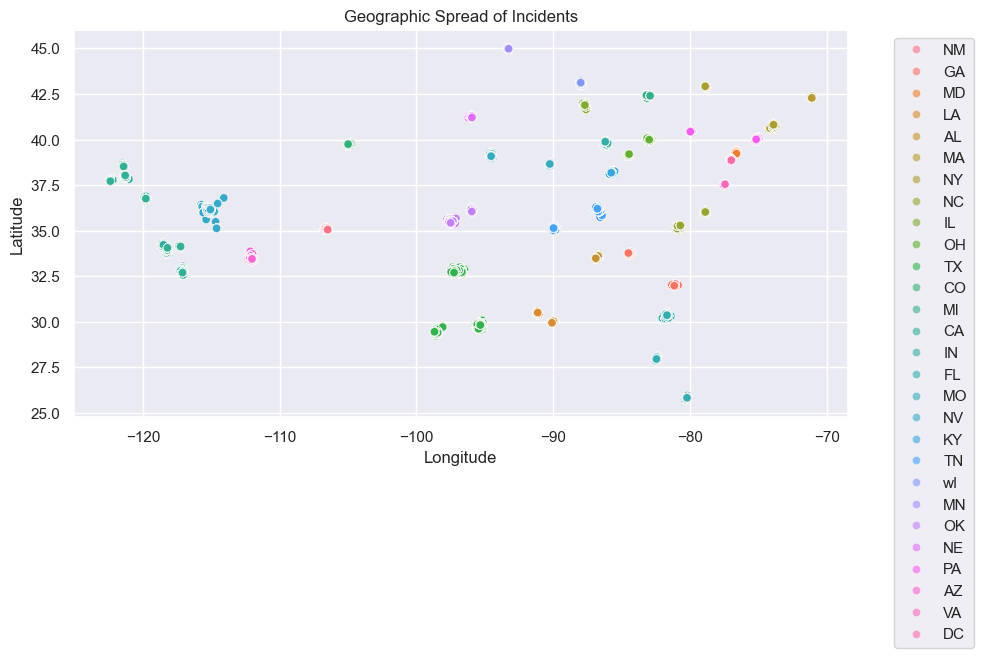

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='lon', y='lat', hue='state', alpha=0.6)
plt.title("Geographic Spread of Incidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

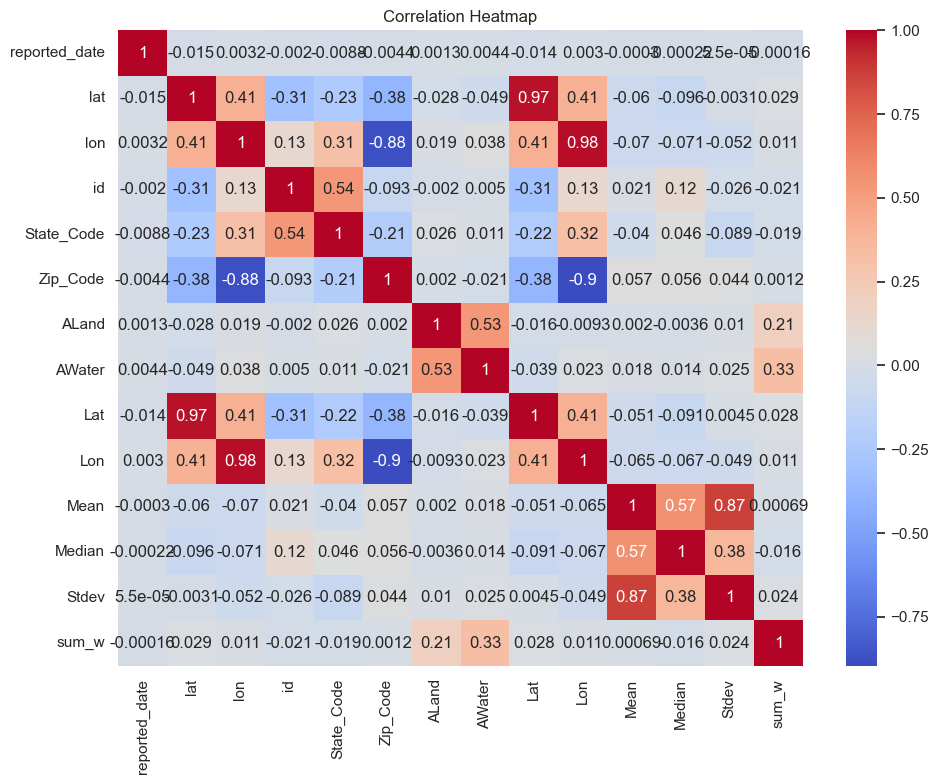

In [34]:
plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


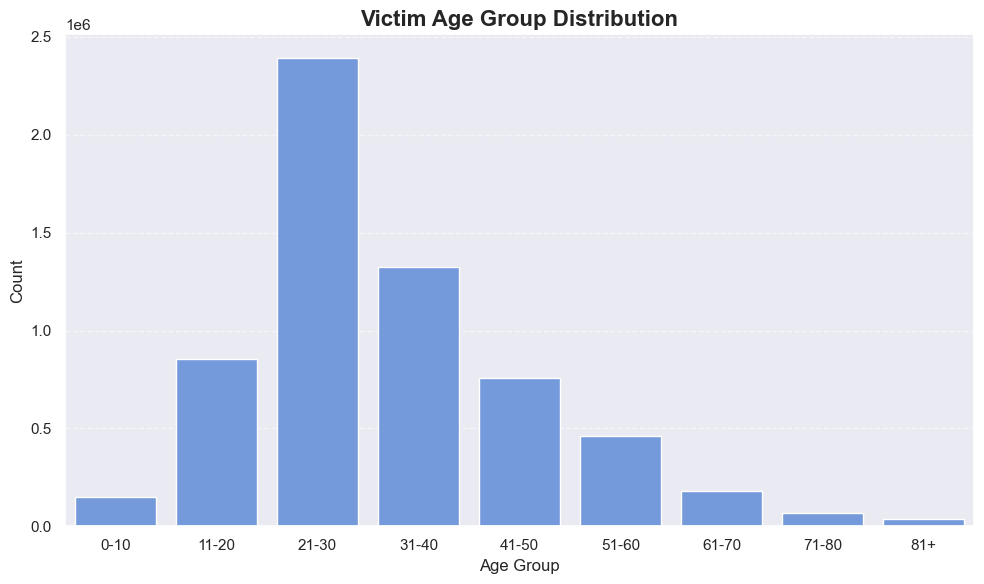

In [40]:
# Convert victim_age to numeric, forcing errors to NaN
df['victim_age'] = pd.to_numeric(df['victim_age'], errors='coerce')

# Drop rows where age is NaN (was non-numeric)
df = df.dropna(subset=['victim_age'])

# Convert to int if you want cleaner values
df['victim_age'] = df['victim_age'].astype(int)
# Create bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50',
          '51-60', '61-70', '71-80', '81+']

# Create age group column
df['age_group'] = pd.cut(df['victim_age'], bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', color='cornflowerblue')

plt.title("Victim Age Group Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



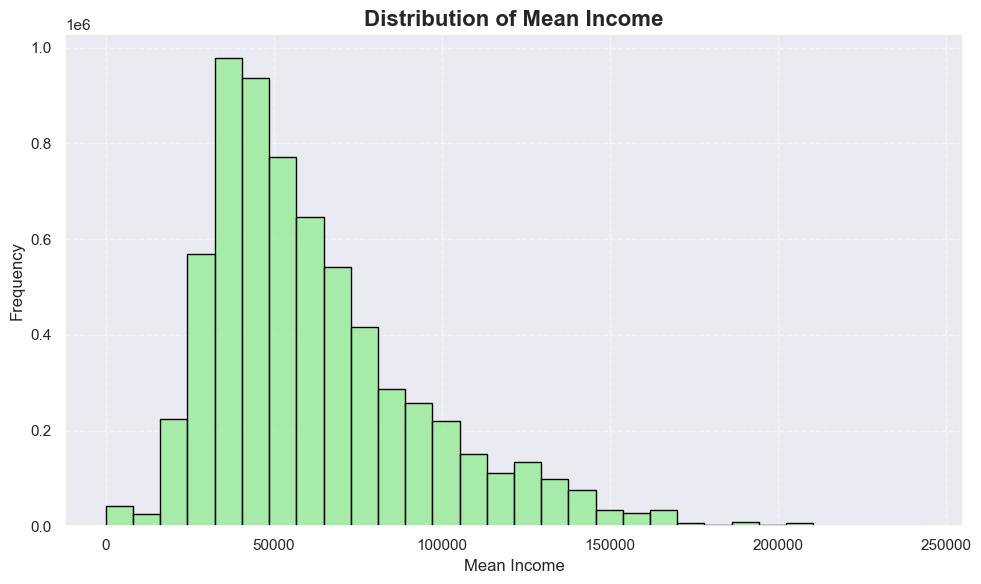

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Mean', bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribution of Mean Income", fontsize=16, fontweight='bold')
plt.xlabel("Mean Income")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


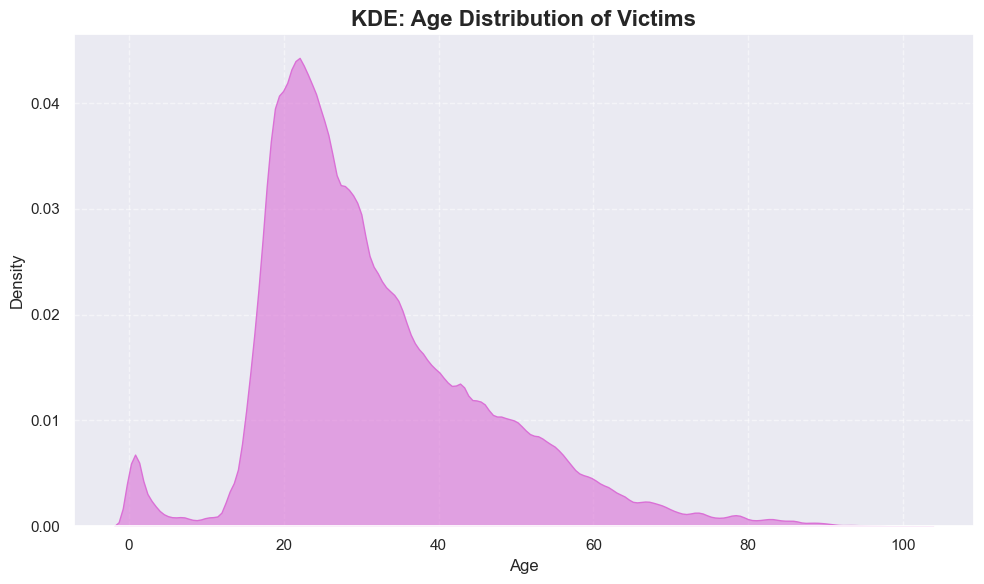

In [41]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='victim_age', fill=True, color='orchid', alpha=0.6)
plt.title("KDE: Age Distribution of Victims", fontsize=16, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


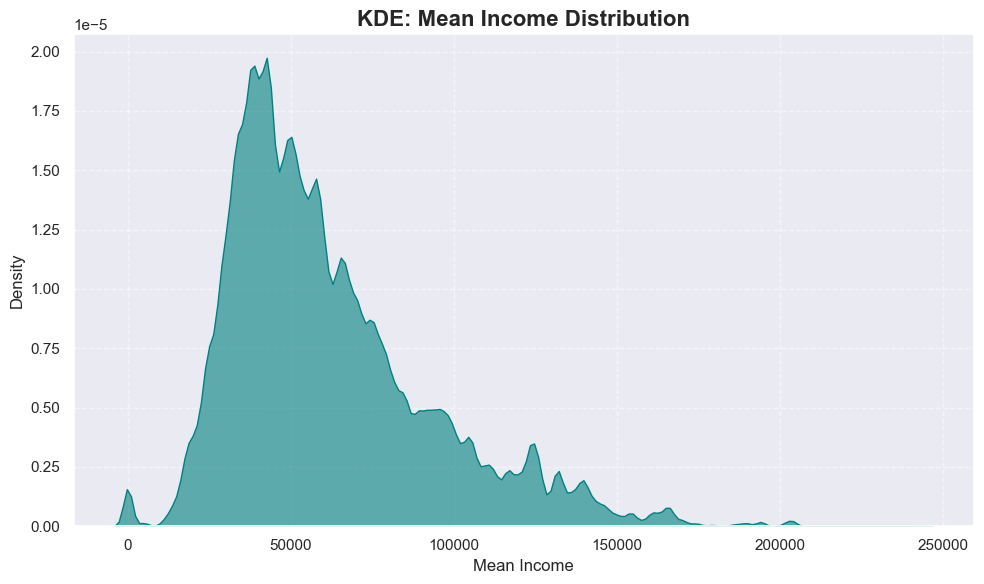

In [42]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Mean', fill=True, color='teal', alpha=0.6)
plt.title("KDE: Mean Income Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Mean Income")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/0j/3lv56g2525j0z_5_twj5hj_m0000gn/T/ipykernel_76627/494455985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='state', y='Mean', palette='pastel')


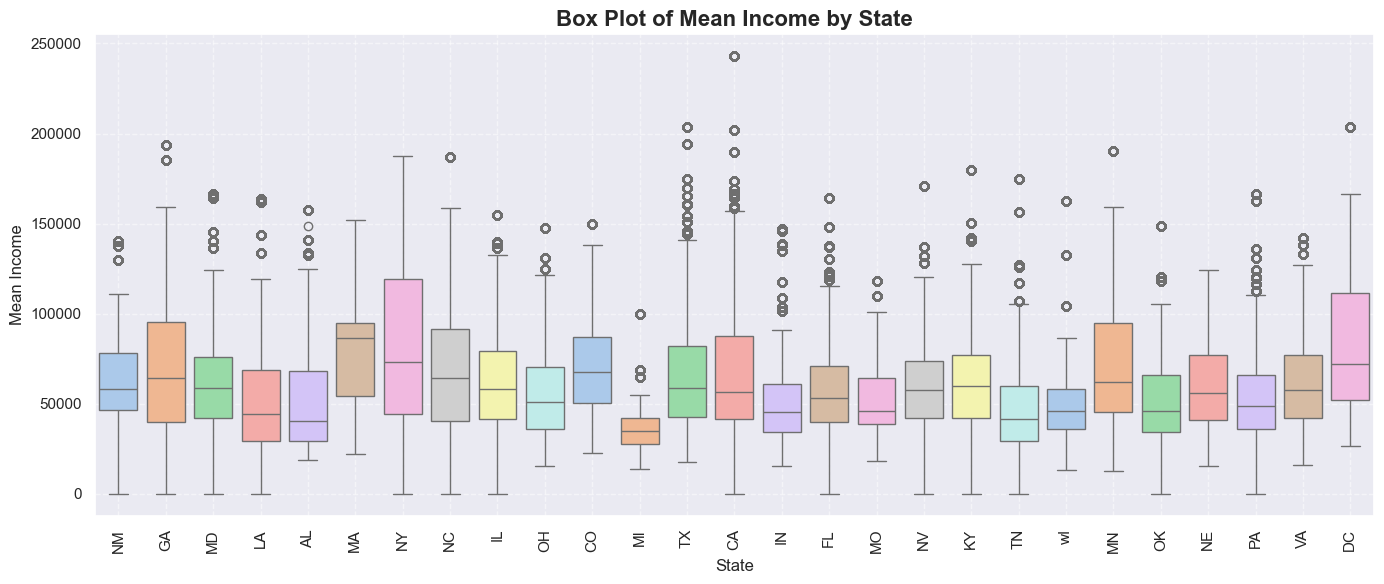

In [43]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='state', y='Mean', palette='pastel')
plt.title("Box Plot of Mean Income by State", fontsize=16, fontweight='bold')
plt.xlabel("State")
plt.ylabel("Mean Income")
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/0j/3lv56g2525j0z_5_twj5hj_m0000gn/T/ipykernel_76627/3959841121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='state', y='Mean', palette='Set3', inner='quartile')


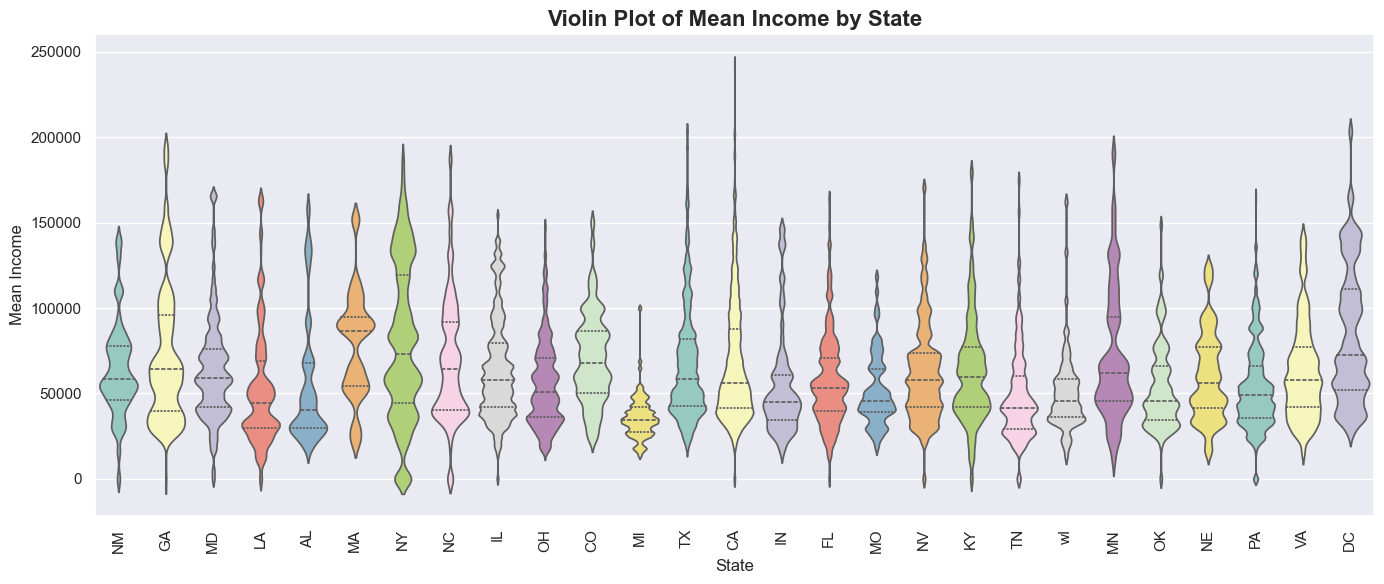

In [44]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='state', y='Mean', palette='Set3', inner='quartile')
plt.title("Violin Plot of Mean Income by State", fontsize=16, fontweight='bold')
plt.xlabel("State")
plt.ylabel("Mean Income")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/var/folders/0j/3lv56g2525j0z_5_twj5hj_m0000gn/T/ipykernel_76627/2454531995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=race_counts.index, y=race_counts.values, palette="Set2")


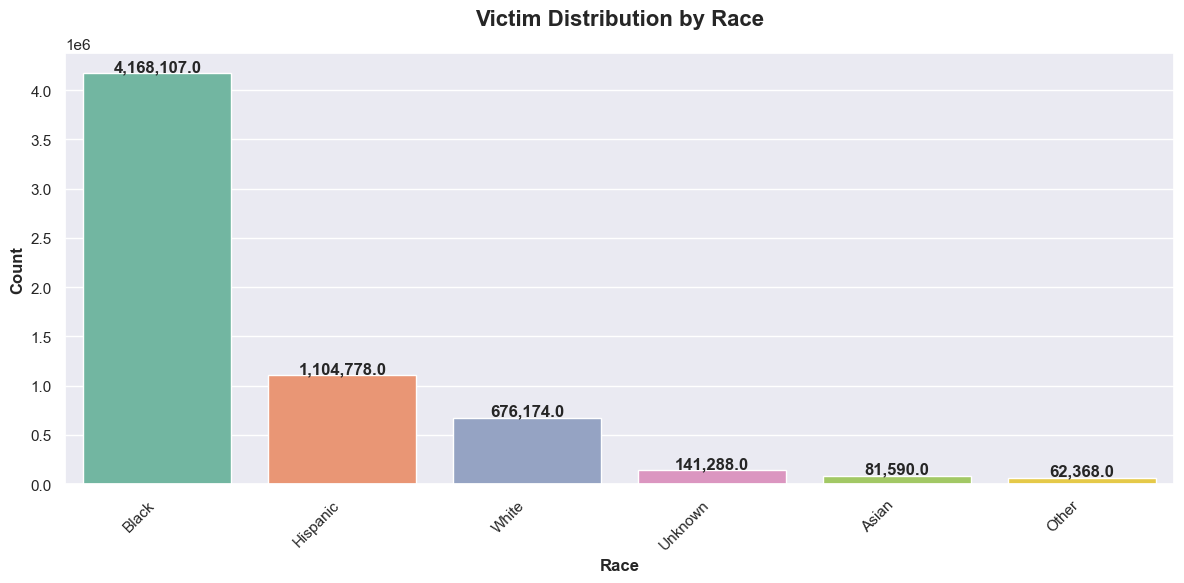

In [46]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=race_counts.index, y=race_counts.values, palette="Set2")

plt.title("Victim Distribution by Race", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Race", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontweight='bold')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Victim Race Distribution')

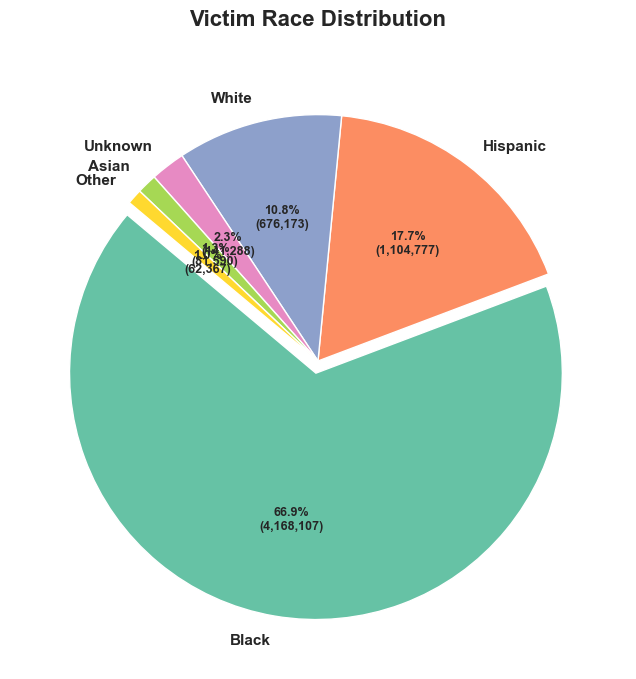

In [59]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.weight'] = 'bold'

# Prepare data (keep only top 5 and group rest as "Other")
race_counts = df['victim_race'].value_counts()
top_races = race_counts.nlargest(5)
other_count = race_counts.iloc[5:].sum()
race_counts_clean = pd.concat([top_races, pd.Series({'Other': other_count})])

# Colors & explode
colors = sns.color_palette("Set2", len(race_counts_clean))
explode = [0.05] + [0] * (len(race_counts_clean) - 1)

# Create figure
plt.figure(figsize=(10, 8))

# Pie chart
wedges, texts, autotexts = plt.pie(
    race_counts_clean,
    labels=race_counts_clean.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p/100 * race_counts_clean.sum()):,})',
    startangle=140,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 11},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Style autopct
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

# Title & subtitle
plt.title("Victim Race Distribution", fontsize=16, fontweight='bold', pad=20)


In [57]:
import plotly.express as px

state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

fig = px.choropleth(
    state_counts,
    locations='state',
    locationmode='USA-states',
    color='count',
    color_continuous_scale='Oranges',  # 🍊 updated to a proper orange palette
    scope="usa",
    title="Number of Incidents per US State"
)
fig.show()



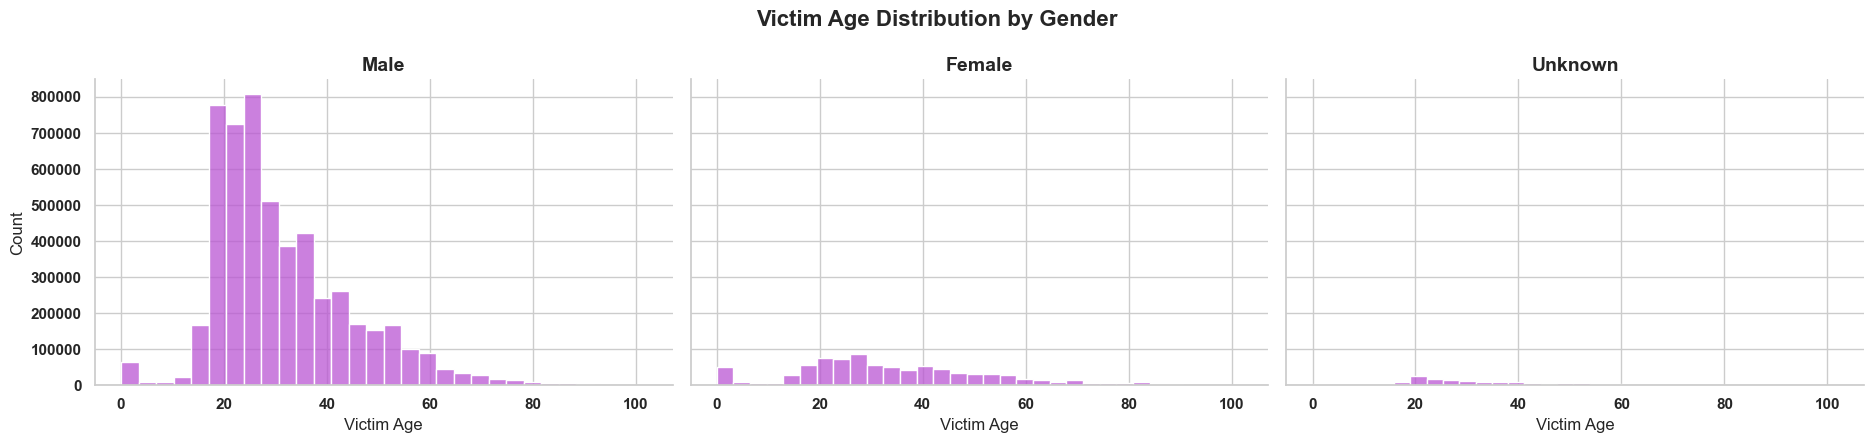

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing ages for cleaner visualization
df_clean = df.dropna(subset=['victim_age', 'victim_sex'])

# Set visual style
sns.set(style="whitegrid")

# Create FacetGrid with more control
g = sns.FacetGrid(df_clean, col='victim_sex', height=4.5, aspect=1.4, margin_titles=True)
g.map_dataframe(
    sns.histplot,
    x='victim_age',
    bins=30,               # ✅ More bins for smoother detail
    color='mediumorchid',
    edgecolor='white',
)

# Improve titles and labels
g.set_titles(col_template="{col_name}", size=14, fontweight='bold')
g.set_axis_labels("Victim Age", "Count")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Victim Age Distribution by Gender", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

